In [32]:
import sys
import math
import pandas as pd
import numpy as np
from numpy import *
import scipy.stats as stats
from scipy.io import loadmat
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

In [33]:
df = pd.read_csv("dataset_3.csv")
df = df.drop(['No'], axis=1)
print("Data Length: ", len(df))
df = df.dropna()
print("Data Length after removing NaN values: ", len(df))
print(df.head())

Data Length:  43824
Data Length after removing NaN values:  41757
    year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
24  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
25  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
26  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
27  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
28  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0


In [34]:
le = preprocessing.LabelEncoder()
le.fit(np.unique(df['cbwd']))
df['cbwd'] = le.transform(df['cbwd'])
print(df.head())

    year  month  day  hour  pm2.5  DEWP  TEMP    PRES  cbwd   Iws  Is  Ir
24  2010      1    2     0  129.0   -16  -4.0  1020.0     2  1.79   0   0
25  2010      1    2     1  148.0   -15  -4.0  1020.0     2  2.68   0   0
26  2010      1    2     2  159.0   -11  -5.0  1021.0     2  3.57   0   0
27  2010      1    2     3  181.0    -7  -5.0  1022.0     2  5.36   1   0
28  2010      1    2     4  138.0    -7  -5.0  1022.0     2  6.25   2   0


In [35]:
target = "month"

In [39]:
trainAccEn = []
testAccEn = []
treeEn = []
TotalNodesEn = []
for max_level in [4, 8, 10, 15, 20, 30]:
    X_train,X_test,y_train,y_test = train_test_split(df.drop([target], axis=1), df[target], test_size=0.3)
    for i in np.arange(0, 100, 1):
        decision_tree = DecisionTreeClassifier(max_leaf_nodes=max_level, random_state=0)
        decision_tree.fit(X_train, y_train)
        treeEn.append(decision_tree)

    correct = 0
    dataPredict = []
    for tree in treeEn:
        y_predicted = tree.predict(X_train)
        dataPredict.append(y_predicted)
    
    trainAcc = 0
    for y_predicted in dataPredict:
        trainAcc += accuracy_score(y_train,y_predicted)
    trainAccEn.append(trainAcc/len(X_train))
    
    correct = 0
    dataPredict = []
    for tree in treeEn:
        y_predicted = tree.predict(X_test)
        dataPredict.append(y_predicted)
    
    testAcc = 0
    for y_predicted in dataPredict:
        testAcc += accuracy_score(y_test, y_predicted)
    testAccEn.append(testAcc/len(X_test))

In [43]:
level = [4, 8, 10, 15, 20, 30]
i = 0
for acc in trainAccEn:
    print("\nThe train accuracy for ", level[i], "is: ", acc)
    i += 1
i = 0
for acc in testAccEn:
    print("\nThe test accuracy for ", level[i], "is: ", acc)
    i += 1


The train accuracy for  4 is:  0.0009338263351131836

The train accuracy for  8 is:  0.002242213245854613

The train accuracy for  10 is:  0.0035022584323040253

The train accuracy for  15 is:  0.004878183296838414

The train accuracy for  20 is:  0.006318251659949161

The train accuracy for  30 is:  0.00789831203820097

The test accuracy for  4 is:  0.002168195604553332

The test accuracy for  8 is:  0.005153844914849255

The test accuracy for  10 is:  0.00820065989603463

The test accuracy for  15 is:  0.011402300481659303

The test accuracy for  20 is:  0.014789349507167664

The test accuracy for  30 is:  0.01842233550104478


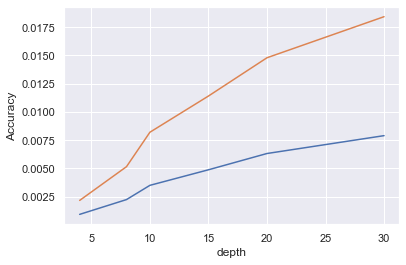

In [44]:
depth = [4, 8, 10, 15, 20, 30]
plt.plot(depth, trainAccEn)
plt.plot(depth, testAccEn)
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.show()